In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt

from dataset import Shakespeare
from model import CharRNN, CharLSTM


def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 2)
    correct = (predicted == targets).float()
    accuracy = correct.sum() / targets.numel()
    return accuracy.item()



def train(model, trn_loader, device, criterion, optimizer):
    model.train()
    total_loss = 0
    total_accuracy = 0
    for inputs, targets in trn_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        hidden = model.init_hidden(inputs.size(0))
        if isinstance(hidden, tuple):
            hidden = tuple(h.to(device) for h in hidden)
        else:
            hidden = hidden.to(device)
        outputs, hidden = model(inputs, hidden)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        accuracy = calculate_accuracy(outputs, targets)
        total_accuracy += accuracy
    return total_loss / len(trn_loader), total_accuracy / len(trn_loader)

def validate(model, val_loader, device, criterion):
    model.eval()
    total_loss = 0
    total_accuracy = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            hidden = model.init_hidden(inputs.size(0))
            if isinstance(hidden, tuple):
                hidden = tuple(h.to(device) for h in hidden)
            else:
                hidden = hidden.to(device)
            outputs, hidden = model(inputs, hidden)
            loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
            total_loss += loss.item()
            accuracy = calculate_accuracy(outputs, targets)
            total_accuracy += accuracy
    return total_loss / len(val_loader), total_accuracy / len(val_loader)







Training with 1 hidden layers

Epoch 1/20, RNN Loss: 1.5579, RNN Accuracy: 0.5322, LSTM Loss: 1.4895, LSTM Accuracy: 0.5488
Epoch 2/20, RNN Loss: 1.4995, RNN Accuracy: 0.5472, LSTM Loss: 1.3985, LSTM Accuracy: 0.5712
Epoch 3/20, RNN Loss: 1.4766, RNN Accuracy: 0.5521, LSTM Loss: 1.3530, LSTM Accuracy: 0.5829
Epoch 4/20, RNN Loss: 1.4612, RNN Accuracy: 0.5551, LSTM Loss: 1.3216, LSTM Accuracy: 0.5923
Epoch 5/20, RNN Loss: 1.4515, RNN Accuracy: 0.5579, LSTM Loss: 1.2983, LSTM Accuracy: 0.5983
Epoch 6/20, RNN Loss: 1.4440, RNN Accuracy: 0.5596, LSTM Loss: 1.2823, LSTM Accuracy: 0.6026
Epoch 7/20, RNN Loss: 1.4387, RNN Accuracy: 0.5615, LSTM Loss: 1.2665, LSTM Accuracy: 0.6074
Epoch 8/20, RNN Loss: 1.4359, RNN Accuracy: 0.5628, LSTM Loss: 1.2567, LSTM Accuracy: 0.6100
Epoch 9/20, RNN Loss: 1.4345, RNN Accuracy: 0.5620, LSTM Loss: 1.2464, LSTM Accuracy: 0.6135
Epoch 10/20, RNN Loss: 1.4290, RNN Accuracy: 0.5636, LSTM Loss: 1.2401, LSTM Accuracy: 0.6154
Epoch 11/20, RNN Loss: 1.4273, RNN Ac

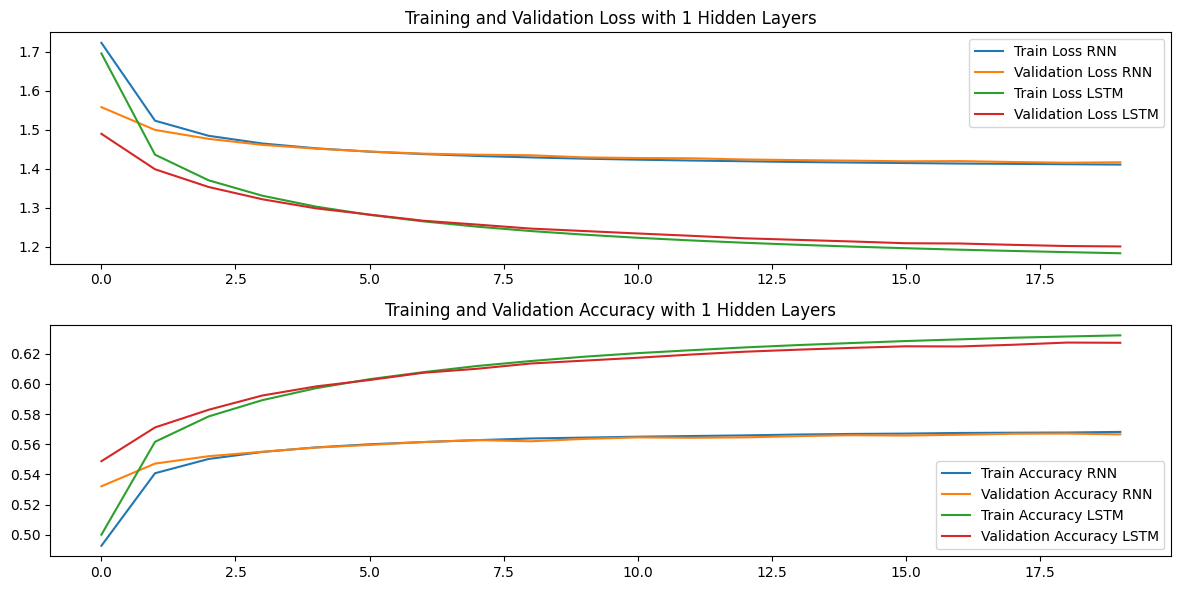


Training with 2 hidden layers

Epoch 1/20, RNN Loss: 1.4471, RNN Accuracy: 0.5594, LSTM Loss: 1.4197, LSTM Accuracy: 0.5662
Epoch 2/20, RNN Loss: 1.3768, RNN Accuracy: 0.5762, LSTM Loss: 1.3018, LSTM Accuracy: 0.5955
Epoch 3/20, RNN Loss: 1.3398, RNN Accuracy: 0.5865, LSTM Loss: 1.2294, LSTM Accuracy: 0.6168
Epoch 4/20, RNN Loss: 1.3172, RNN Accuracy: 0.5917, LSTM Loss: 1.1698, LSTM Accuracy: 0.6332
Epoch 5/20, RNN Loss: 1.3061, RNN Accuracy: 0.5957, LSTM Loss: 1.1228, LSTM Accuracy: 0.6479
Epoch 6/20, RNN Loss: 1.2932, RNN Accuracy: 0.5984, LSTM Loss: 1.0881, LSTM Accuracy: 0.6593
Epoch 7/20, RNN Loss: 1.2880, RNN Accuracy: 0.6001, LSTM Loss: 1.0587, LSTM Accuracy: 0.6684
Epoch 8/20, RNN Loss: 1.2804, RNN Accuracy: 0.6027, LSTM Loss: 1.0326, LSTM Accuracy: 0.6768
Epoch 9/20, RNN Loss: 1.2768, RNN Accuracy: 0.6032, LSTM Loss: 1.0120, LSTM Accuracy: 0.6833
Epoch 10/20, RNN Loss: 1.2711, RNN Accuracy: 0.6053, LSTM Loss: 0.9937, LSTM Accuracy: 0.6892
Epoch 11/20, RNN Loss: 1.2682, RNN Ac

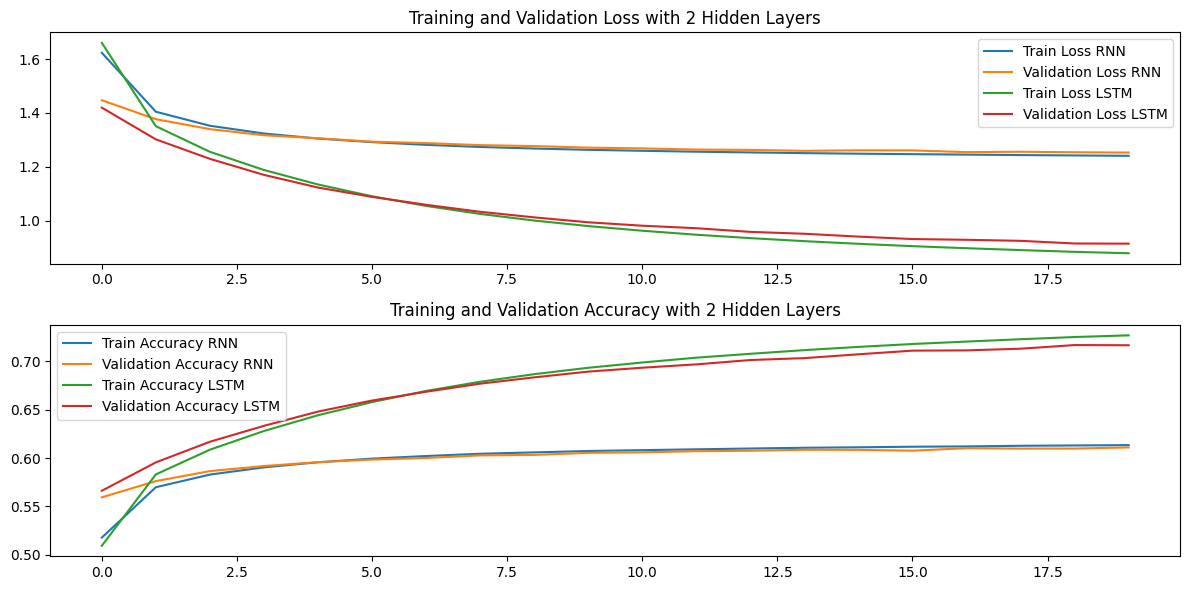


Training with 3 hidden layers

Epoch 1/20, RNN Loss: 1.4003, RNN Accuracy: 0.5726, LSTM Loss: 1.4404, LSTM Accuracy: 0.5625
Epoch 2/20, RNN Loss: 1.3161, RNN Accuracy: 0.5933, LSTM Loss: 1.2906, LSTM Accuracy: 0.6007
Epoch 3/20, RNN Loss: 1.2733, RNN Accuracy: 0.6037, LSTM Loss: 1.1956, LSTM Accuracy: 0.6267
Epoch 4/20, RNN Loss: 1.2421, RNN Accuracy: 0.6126, LSTM Loss: 1.1210, LSTM Accuracy: 0.6491
Epoch 5/20, RNN Loss: 1.2230, RNN Accuracy: 0.6182, LSTM Loss: 1.0580, LSTM Accuracy: 0.6686
Epoch 6/20, RNN Loss: 1.2128, RNN Accuracy: 0.6218, LSTM Loss: 1.0046, LSTM Accuracy: 0.6862
Epoch 7/20, RNN Loss: 1.2010, RNN Accuracy: 0.6251, LSTM Loss: 0.9604, LSTM Accuracy: 0.7006
Epoch 8/20, RNN Loss: 1.1888, RNN Accuracy: 0.6284, LSTM Loss: 0.9268, LSTM Accuracy: 0.7113
Epoch 9/20, RNN Loss: 1.1860, RNN Accuracy: 0.6293, LSTM Loss: 0.8984, LSTM Accuracy: 0.7199
Epoch 10/20, RNN Loss: 1.1848, RNN Accuracy: 0.6299, LSTM Loss: 0.8750, LSTM Accuracy: 0.7282
Epoch 11/20, RNN Loss: 1.1769, RNN Ac

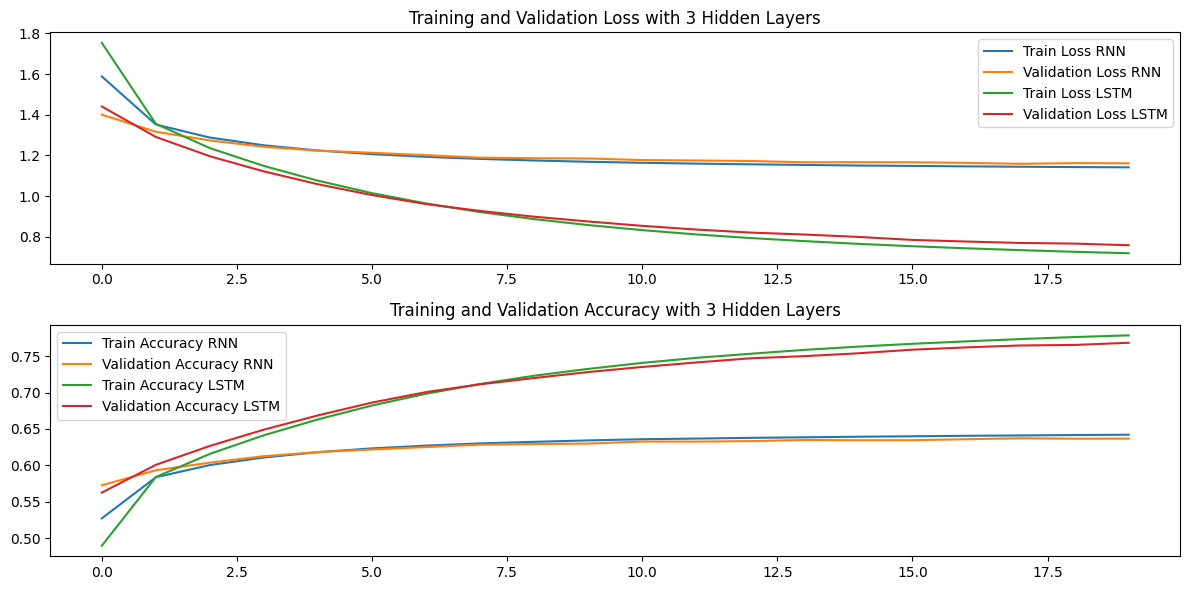


Training with 4 hidden layers

Epoch 1/20, RNN Loss: 1.3832, RNN Accuracy: 0.5755, LSTM Loss: 1.4798, LSTM Accuracy: 0.5577
Epoch 2/20, RNN Loss: 1.2890, RNN Accuracy: 0.5995, LSTM Loss: 1.2872, LSTM Accuracy: 0.6054
Epoch 3/20, RNN Loss: 1.2365, RNN Accuracy: 0.6154, LSTM Loss: 1.1680, LSTM Accuracy: 0.6396
Epoch 4/20, RNN Loss: 1.1984, RNN Accuracy: 0.6259, LSTM Loss: 1.0758, LSTM Accuracy: 0.6661
Epoch 5/20, RNN Loss: 1.1791, RNN Accuracy: 0.6320, LSTM Loss: 1.0013, LSTM Accuracy: 0.6887
Epoch 6/20, RNN Loss: 1.1582, RNN Accuracy: 0.6379, LSTM Loss: 0.9355, LSTM Accuracy: 0.7095
Epoch 7/20, RNN Loss: 1.1453, RNN Accuracy: 0.6423, LSTM Loss: 0.8833, LSTM Accuracy: 0.7255
Epoch 8/20, RNN Loss: 1.1386, RNN Accuracy: 0.6442, LSTM Loss: 0.8486, LSTM Accuracy: 0.7364
Epoch 9/20, RNN Loss: 1.1298, RNN Accuracy: 0.6471, LSTM Loss: 0.8084, LSTM Accuracy: 0.7505
Epoch 10/20, RNN Loss: 1.1290, RNN Accuracy: 0.6467, LSTM Loss: 0.7886, LSTM Accuracy: 0.7560
Epoch 11/20, RNN Loss: 1.1201, RNN Ac

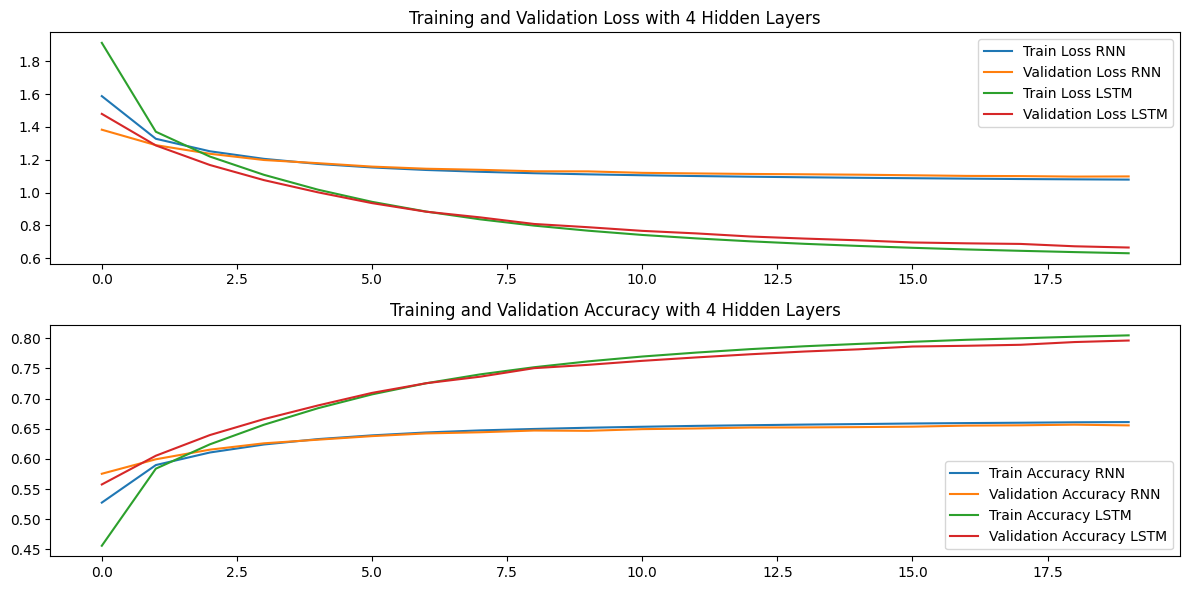


Training with 5 hidden layers

Epoch 1/20, RNN Loss: 1.3909, RNN Accuracy: 0.5745, LSTM Loss: 1.5596, LSTM Accuracy: 0.5371
Epoch 2/20, RNN Loss: 1.2787, RNN Accuracy: 0.6040, LSTM Loss: 1.3345, LSTM Accuracy: 0.5937
Epoch 3/20, RNN Loss: 1.2204, RNN Accuracy: 0.6210, LSTM Loss: 1.2107, LSTM Accuracy: 0.6284
Epoch 4/20, RNN Loss: 1.1813, RNN Accuracy: 0.6319, LSTM Loss: 1.1077, LSTM Accuracy: 0.6587
Epoch 5/20, RNN Loss: 1.1550, RNN Accuracy: 0.6399, LSTM Loss: 1.0264, LSTM Accuracy: 0.6839
Epoch 6/20, RNN Loss: 1.1329, RNN Accuracy: 0.6464, LSTM Loss: 0.9576, LSTM Accuracy: 0.7051
Epoch 7/20, RNN Loss: 1.1199, RNN Accuracy: 0.6506, LSTM Loss: 0.9021, LSTM Accuracy: 0.7222
Epoch 8/20, RNN Loss: 1.1083, RNN Accuracy: 0.6534, LSTM Loss: 0.8549, LSTM Accuracy: 0.7377
Epoch 9/20, RNN Loss: 1.1058, RNN Accuracy: 0.6546, LSTM Loss: 0.8266, LSTM Accuracy: 0.7459
Epoch 10/20, RNN Loss: 1.0967, RNN Accuracy: 0.6573, LSTM Loss: 0.7916, LSTM Accuracy: 0.7566
Epoch 11/20, RNN Loss: 1.0881, RNN Ac

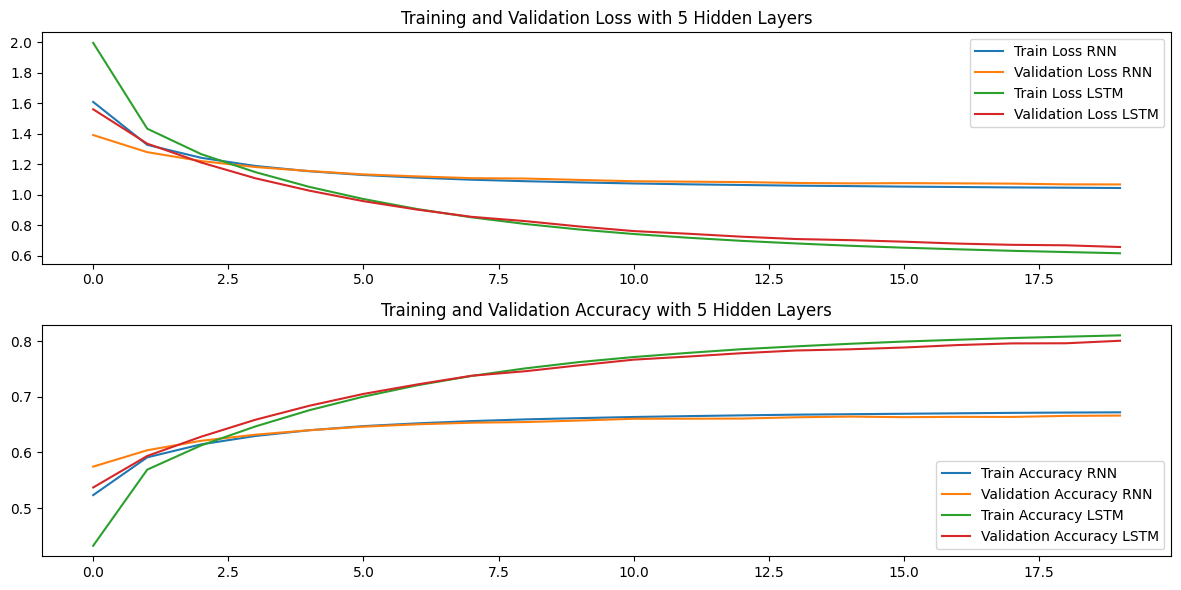

In [8]:
def main():
    dataset = Shakespeare('shakespeare.txt')
    batch_size = 64
    validation_split = 0.2
    shuffle_dataset = True
    random_seed = 24

    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    if shuffle_dataset:
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, val_indices = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

    vocab_size = len(dataset.chars)
    hidden_size = 128
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    num_epochs = 20

    for num_layers in range(1, 6):
        print(f'\nTraining with {num_layers} hidden layers\n')

        model_rnn = CharRNN(vocab_size, hidden_size, num_layers).to(device)
        model_lstm = CharLSTM(vocab_size, hidden_size, num_layers).to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=0.001)
        optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=0.001)

        trn_losses_rnn, val_losses_rnn = [], []
        trn_acc_rnn, val_acc_rnn = [], []
        trn_losses_lstm = []
        val_losses_lstm = []
        trn_acc_lstm = []
        val_acc_lstm = []

        for epoch in range(num_epochs):
            trn_loss_rnn, trn_accuracy_rnn = train(model_rnn, train_loader, device, criterion, optimizer_rnn)
            val_loss_rnn, val_accuracy_rnn = validate(model_rnn, val_loader, device, criterion)
            trn_losses_rnn.append(trn_loss_rnn)
            val_losses_rnn.append(val_loss_rnn)
            trn_acc_rnn.append(trn_accuracy_rnn)
            val_acc_rnn.append(val_accuracy_rnn)

            trn_loss_lstm, trn_accuracy_lstm = train(model_lstm, train_loader, device, criterion, optimizer_lstm)
            val_loss_lstm, val_accuracy_lstm = validate(model_lstm, val_loader, device, criterion)
            trn_losses_lstm.append(trn_loss_lstm)
            val_losses_lstm.append(val_loss_lstm)
            trn_acc_lstm.append(trn_accuracy_lstm)
            val_acc_lstm.append(val_accuracy_lstm)

            print(f'Epoch {epoch+1}/{num_epochs}, RNN Loss: {val_loss_rnn:.4f}, RNN Accuracy: {val_accuracy_rnn:.4f}, '
                  f'LSTM Loss: {val_loss_lstm:.4f}, LSTM Accuracy: {val_accuracy_lstm:.4f}')

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(trn_losses_rnn, label='Train Loss RNN')
        plt.plot(val_losses_rnn, label='Validation Loss RNN')
        plt.plot(trn_losses_lstm, label='Train Loss LSTM')
        plt.plot(val_losses_lstm, label='Validation Loss LSTM')
        plt.title(f'Training and Validation Loss with {num_layers} Hidden Layers')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(trn_acc_rnn, label='Train Accuracy RNN')
        plt.plot(val_acc_rnn, label='Validation Accuracy RNN')
        plt.plot(trn_acc_lstm, label='Train Accuracy LSTM')
        plt.plot(val_acc_lstm, label='Validation Accuracy LSTM')
        plt.title(f'Training and Validation Accuracy with {num_layers} Hidden Layers')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    main()

In [9]:
import time


Training with 6 hidden layers

Epoch 1/20, RNN Loss: 1.4040, RNN Accuracy: 0.5732, LSTM Loss: 1.7606, LSTM Accuracy: 0.4902
Epoch 2/20, RNN Loss: 1.2892, RNN Accuracy: 0.6015, LSTM Loss: 1.5409, LSTM Accuracy: 0.5427
Epoch 3/20, RNN Loss: 1.2217, RNN Accuracy: 0.6205, LSTM Loss: 1.4005, LSTM Accuracy: 0.5796
Epoch 4/20, RNN Loss: 1.1749, RNN Accuracy: 0.6349, LSTM Loss: 1.3041, LSTM Accuracy: 0.6036
Epoch 5/20, RNN Loss: 1.1465, RNN Accuracy: 0.6429, LSTM Loss: 1.2226, LSTM Accuracy: 0.6273
Epoch 6/20, RNN Loss: 1.1265, RNN Accuracy: 0.6490, LSTM Loss: 1.1538, LSTM Accuracy: 0.6475
Epoch 7/20, RNN Loss: 1.1118, RNN Accuracy: 0.6538, LSTM Loss: 1.0899, LSTM Accuracy: 0.6674
Epoch 8/20, RNN Loss: 1.0930, RNN Accuracy: 0.6597, LSTM Loss: 1.0361, LSTM Accuracy: 0.6842
Epoch 9/20, RNN Loss: 1.0865, RNN Accuracy: 0.6609, LSTM Loss: 0.9912, LSTM Accuracy: 0.6974
Epoch 10/20, RNN Loss: 1.0823, RNN Accuracy: 0.6623, LSTM Loss: 0.9510, LSTM Accuracy: 0.7102
Epoch 11/20, RNN Loss: 1.0772, RNN Ac

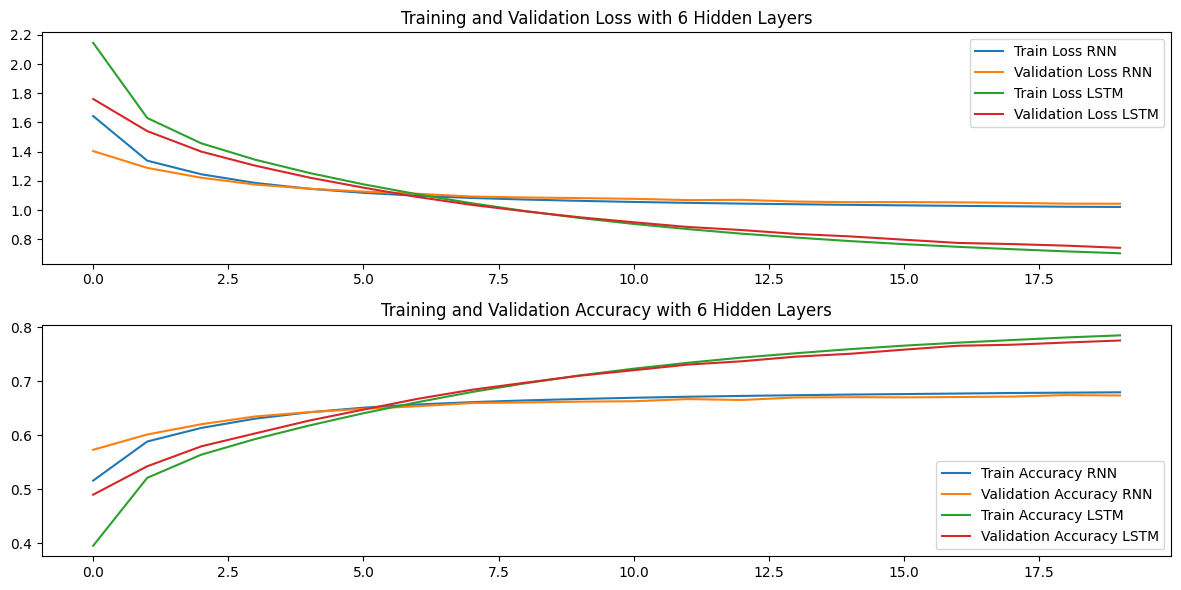

1427.1053304672241

Training with 7 hidden layers

Epoch 1/20, RNN Loss: 1.4437, RNN Accuracy: 0.5634, LSTM Loss: 1.8618, LSTM Accuracy: 0.4617
Epoch 2/20, RNN Loss: 1.3227, RNN Accuracy: 0.5923, LSTM Loss: 1.6575, LSTM Accuracy: 0.5133
Epoch 3/20, RNN Loss: 1.2440, RNN Accuracy: 0.6150, LSTM Loss: 1.5488, LSTM Accuracy: 0.5413
Epoch 4/20, RNN Loss: 1.2002, RNN Accuracy: 0.6272, LSTM Loss: 1.4627, LSTM Accuracy: 0.5631
Epoch 5/20, RNN Loss: 1.1624, RNN Accuracy: 0.6395, LSTM Loss: 1.3924, LSTM Accuracy: 0.5823
Epoch 6/20, RNN Loss: 1.1365, RNN Accuracy: 0.6468, LSTM Loss: 1.3278, LSTM Accuracy: 0.5983
Epoch 7/20, RNN Loss: 1.1202, RNN Accuracy: 0.6518, LSTM Loss: 1.2812, LSTM Accuracy: 0.6109
Epoch 8/20, RNN Loss: 1.1048, RNN Accuracy: 0.6567, LSTM Loss: 1.2234, LSTM Accuracy: 0.6292
Epoch 9/20, RNN Loss: 1.0975, RNN Accuracy: 0.6574, LSTM Loss: 1.1794, LSTM Accuracy: 0.6423
Epoch 10/20, RNN Loss: 1.0917, RNN Accuracy: 0.6594, LSTM Loss: 1.1372, LSTM Accuracy: 0.6549
Epoch 11/20, RNN L

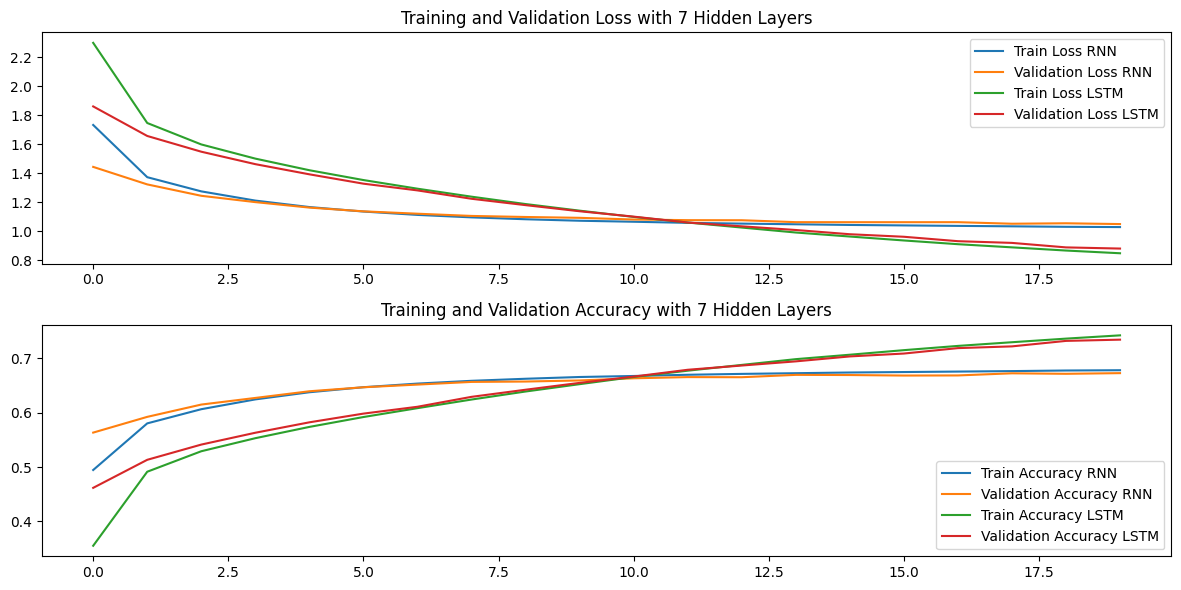

1650.1147270202637

Training with 8 hidden layers

Epoch 1/20, RNN Loss: 1.4832, RNN Accuracy: 0.5543, LSTM Loss: 1.9278, LSTM Accuracy: 0.4465
Epoch 2/20, RNN Loss: 1.3523, RNN Accuracy: 0.5851, LSTM Loss: 1.7312, LSTM Accuracy: 0.4952
Epoch 3/20, RNN Loss: 1.2798, RNN Accuracy: 0.6056, LSTM Loss: 1.6269, LSTM Accuracy: 0.5218
Epoch 4/20, RNN Loss: 1.2351, RNN Accuracy: 0.6169, LSTM Loss: 1.5786, LSTM Accuracy: 0.5315
Epoch 5/20, RNN Loss: 1.1969, RNN Accuracy: 0.6276, LSTM Loss: 1.5208, LSTM Accuracy: 0.5459
Epoch 6/20, RNN Loss: 1.1687, RNN Accuracy: 0.6365, LSTM Loss: 1.4779, LSTM Accuracy: 0.5571
Epoch 7/20, RNN Loss: 1.1500, RNN Accuracy: 0.6417, LSTM Loss: 1.4517, LSTM Accuracy: 0.5636
Epoch 8/20, RNN Loss: 1.1367, RNN Accuracy: 0.6461, LSTM Loss: 1.4217, LSTM Accuracy: 0.5716
Epoch 9/20, RNN Loss: 1.1195, RNN Accuracy: 0.6514, LSTM Loss: 1.3929, LSTM Accuracy: 0.5796
Epoch 10/20, RNN Loss: 1.1099, RNN Accuracy: 0.6535, LSTM Loss: 1.3803, LSTM Accuracy: 0.5824
Epoch 11/20, RNN L

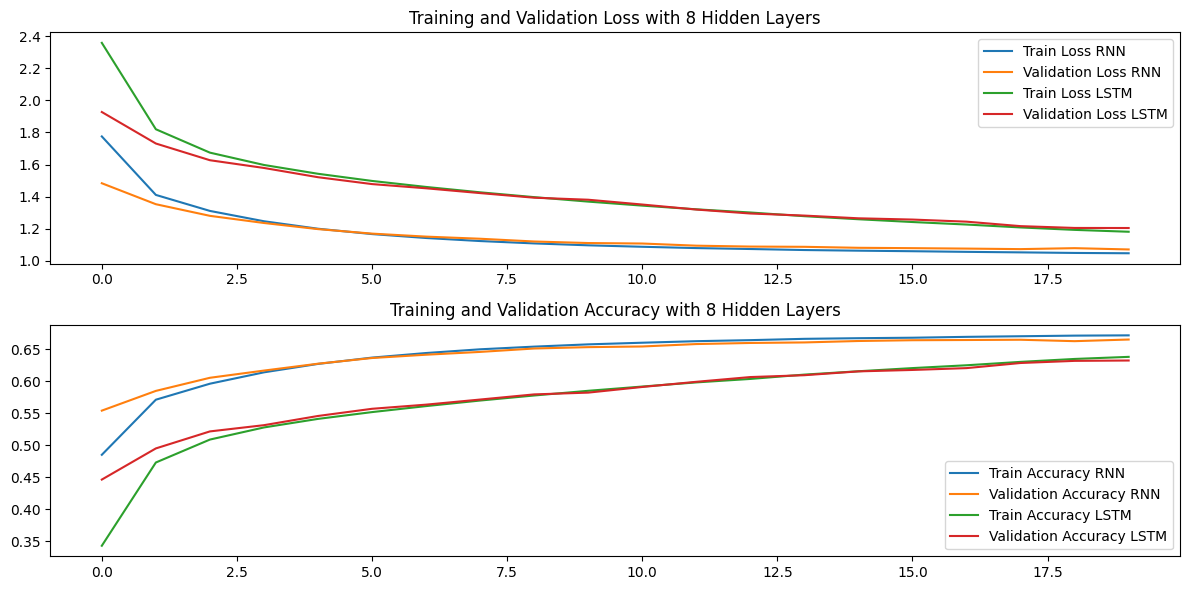

1782.5230062007904

Training with 9 hidden layers

Epoch 1/20, RNN Loss: 1.5719, RNN Accuracy: 0.5364, LSTM Loss: 3.2732, LSTM Accuracy: 0.1524
Epoch 2/20, RNN Loss: 1.4157, RNN Accuracy: 0.5730, LSTM Loss: 2.9583, LSTM Accuracy: 0.1868
Epoch 3/20, RNN Loss: 1.3403, RNN Accuracy: 0.5923, LSTM Loss: 2.8530, LSTM Accuracy: 0.2183
Epoch 4/20, RNN Loss: 1.2936, RNN Accuracy: 0.6050, LSTM Loss: 1.9122, LSTM Accuracy: 0.4413
Epoch 5/20, RNN Loss: 1.2610, RNN Accuracy: 0.6136, LSTM Loss: 1.7417, LSTM Accuracy: 0.4879
Epoch 6/20, RNN Loss: 1.2282, RNN Accuracy: 0.6231, LSTM Loss: 1.6468, LSTM Accuracy: 0.5104
Epoch 7/20, RNN Loss: 1.2003, RNN Accuracy: 0.6300, LSTM Loss: 1.5871, LSTM Accuracy: 0.5251
Epoch 8/20, RNN Loss: 1.1873, RNN Accuracy: 0.6345, LSTM Loss: 1.5487, LSTM Accuracy: 0.5357
Epoch 9/20, RNN Loss: 1.1728, RNN Accuracy: 0.6392, LSTM Loss: 1.5189, LSTM Accuracy: 0.5421
Epoch 10/20, RNN Loss: 1.1646, RNN Accuracy: 0.6405, LSTM Loss: 1.4663, LSTM Accuracy: 0.5568
Epoch 11/20, RNN L

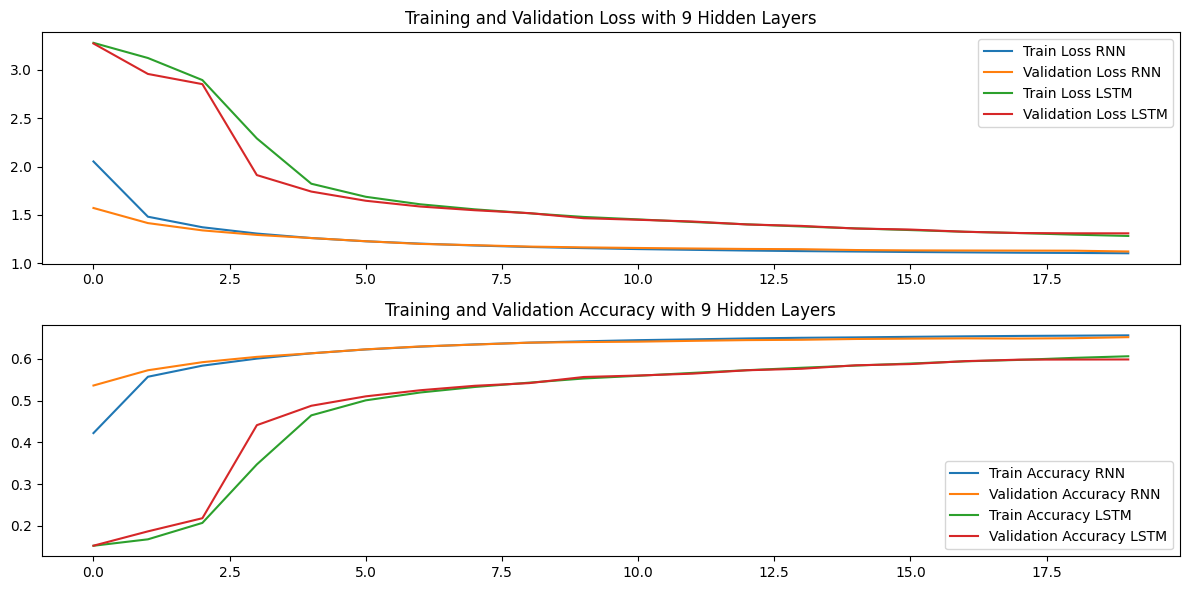

1894.9969911575317

Training with 10 hidden layers

Epoch 1/20, RNN Loss: 1.9352, RNN Accuracy: 0.4358, LSTM Loss: 2.9743, LSTM Accuracy: 0.1845
Epoch 2/20, RNN Loss: 1.6305, RNN Accuracy: 0.5172, LSTM Loss: 2.9311, LSTM Accuracy: 0.1949
Epoch 3/20, RNN Loss: 1.5345, RNN Accuracy: 0.5383, LSTM Loss: 3.2339, LSTM Accuracy: 0.1573
Epoch 4/20, RNN Loss: 1.4809, RNN Accuracy: 0.5507, LSTM Loss: 2.6029, LSTM Accuracy: 0.2675
Epoch 5/20, RNN Loss: 1.4502, RNN Accuracy: 0.5585, LSTM Loss: 2.5384, LSTM Accuracy: 0.2823
Epoch 6/20, RNN Loss: 1.4447, RNN Accuracy: 0.5591, LSTM Loss: 2.0149, LSTM Accuracy: 0.4106
Epoch 7/20, RNN Loss: 1.4109, RNN Accuracy: 0.5676, LSTM Loss: 1.8822, LSTM Accuracy: 0.4447
Epoch 8/20, RNN Loss: 1.4130, RNN Accuracy: 0.5664, LSTM Loss: 1.8121, LSTM Accuracy: 0.4637
Epoch 9/20, RNN Loss: 1.4015, RNN Accuracy: 0.5691, LSTM Loss: 1.7302, LSTM Accuracy: 0.4868
Epoch 10/20, RNN Loss: 1.3735, RNN Accuracy: 0.5760, LSTM Loss: 1.6811, LSTM Accuracy: 0.5004
Epoch 11/20, RNN 

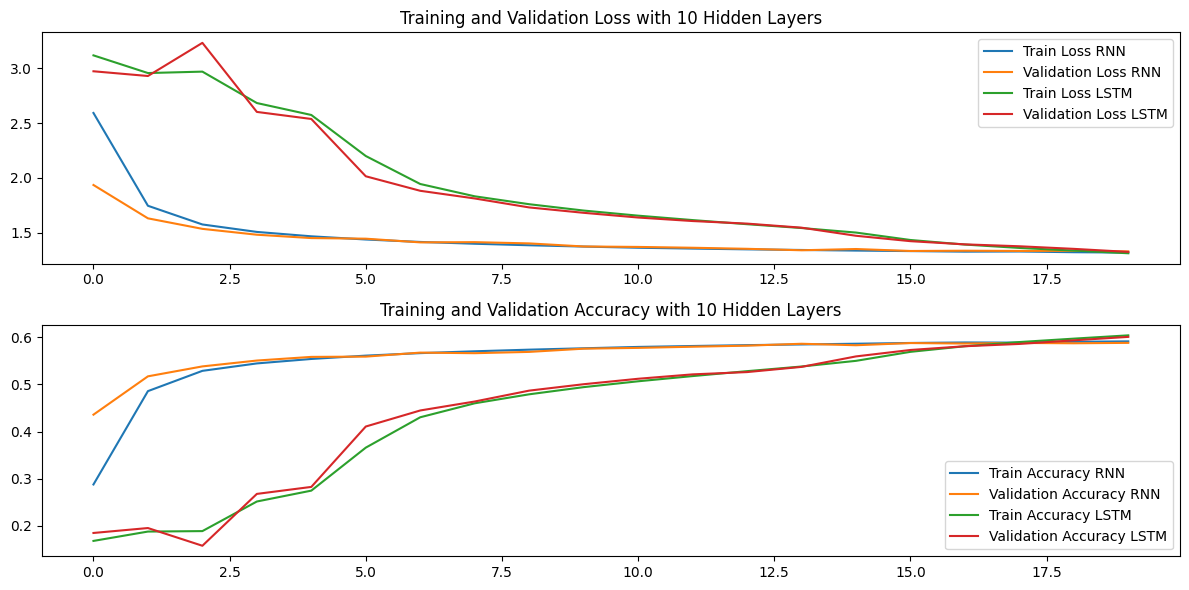

2070.959048986435


In [10]:
def main():
    dataset = Shakespeare('shakespeare.txt')
    batch_size = 64
    validation_split = 0.2
    shuffle_dataset = True
    random_seed = 24

    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    if shuffle_dataset:
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, val_indices = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

    vocab_size = len(dataset.chars)
    hidden_size = 128
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    num_epochs = 20
    
    for num_layers in range(6, 11):
        start=time.time()
        print(f'\nTraining with {num_layers} hidden layers\n')

        model_rnn = CharRNN(vocab_size, hidden_size, num_layers).to(device)
        model_lstm = CharLSTM(vocab_size, hidden_size, num_layers).to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=0.001)
        optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=0.001)

        trn_losses_rnn, val_losses_rnn = [], []
        trn_acc_rnn, val_acc_rnn = [], []
        trn_losses_lstm = []
        val_losses_lstm = []
        trn_acc_lstm = []
        val_acc_lstm = []

        for epoch in range(num_epochs):
            trn_loss_rnn, trn_accuracy_rnn = train(model_rnn, train_loader, device, criterion, optimizer_rnn)
            val_loss_rnn, val_accuracy_rnn = validate(model_rnn, val_loader, device, criterion)
            trn_losses_rnn.append(trn_loss_rnn)
            val_losses_rnn.append(val_loss_rnn)
            trn_acc_rnn.append(trn_accuracy_rnn)
            val_acc_rnn.append(val_accuracy_rnn)

            trn_loss_lstm, trn_accuracy_lstm = train(model_lstm, train_loader, device, criterion, optimizer_lstm)
            val_loss_lstm, val_accuracy_lstm = validate(model_lstm, val_loader, device, criterion)
            trn_losses_lstm.append(trn_loss_lstm)
            val_losses_lstm.append(val_loss_lstm)
            trn_acc_lstm.append(trn_accuracy_lstm)
            val_acc_lstm.append(val_accuracy_lstm)

            print(f'Epoch {epoch+1}/{num_epochs}, RNN Loss: {val_loss_rnn:.4f}, RNN Accuracy: {val_accuracy_rnn:.4f}, '
                  f'LSTM Loss: {val_loss_lstm:.4f}, LSTM Accuracy: {val_accuracy_lstm:.4f}')

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(trn_losses_rnn, label='Train Loss RNN')
        plt.plot(val_losses_rnn, label='Validation Loss RNN')
        plt.plot(trn_losses_lstm, label='Train Loss LSTM')
        plt.plot(val_losses_lstm, label='Validation Loss LSTM')
        plt.title(f'Training and Validation Loss with {num_layers} Hidden Layers')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(trn_acc_rnn, label='Train Accuracy RNN')
        plt.plot(val_acc_rnn, label='Validation Accuracy RNN')
        plt.plot(trn_acc_lstm, label='Train Accuracy LSTM')
        plt.plot(val_acc_lstm, label='Validation Accuracy LSTM')
        plt.title(f'Training and Validation Accuracy with {num_layers} Hidden Layers')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        print(time.time()-start)

if __name__ == '__main__':
    main()


Training with 7 hidden layers

Epoch 1/50, RNN Loss: 1.4608, RNN Accuracy: 0.5584, LSTM Loss: 1.8825, LSTM Accuracy: 0.4565
Epoch 2/50, RNN Loss: 1.3280, RNN Accuracy: 0.5921, LSTM Loss: 1.6625, LSTM Accuracy: 0.5145
Epoch 3/50, RNN Loss: 1.2531, RNN Accuracy: 0.6131, LSTM Loss: 1.5545, LSTM Accuracy: 0.5408
Epoch 4/50, RNN Loss: 1.2046, RNN Accuracy: 0.6276, LSTM Loss: 1.4817, LSTM Accuracy: 0.5588
Epoch 5/50, RNN Loss: 1.1699, RNN Accuracy: 0.6370, LSTM Loss: 1.4055, LSTM Accuracy: 0.5775
Epoch 6/50, RNN Loss: 1.1436, RNN Accuracy: 0.6455, LSTM Loss: 1.3551, LSTM Accuracy: 0.5911
Epoch 7/50, RNN Loss: 1.1273, RNN Accuracy: 0.6501, LSTM Loss: 1.3036, LSTM Accuracy: 0.6057
Epoch 8/50, RNN Loss: 1.1122, RNN Accuracy: 0.6548, LSTM Loss: 1.2605, LSTM Accuracy: 0.6171
Epoch 9/50, RNN Loss: 1.1060, RNN Accuracy: 0.6554, LSTM Loss: 1.2252, LSTM Accuracy: 0.6281
Epoch 10/50, RNN Loss: 1.0917, RNN Accuracy: 0.6609, LSTM Loss: 1.1816, LSTM Accuracy: 0.6407
Epoch 11/50, RNN Loss: 1.0891, RNN Ac

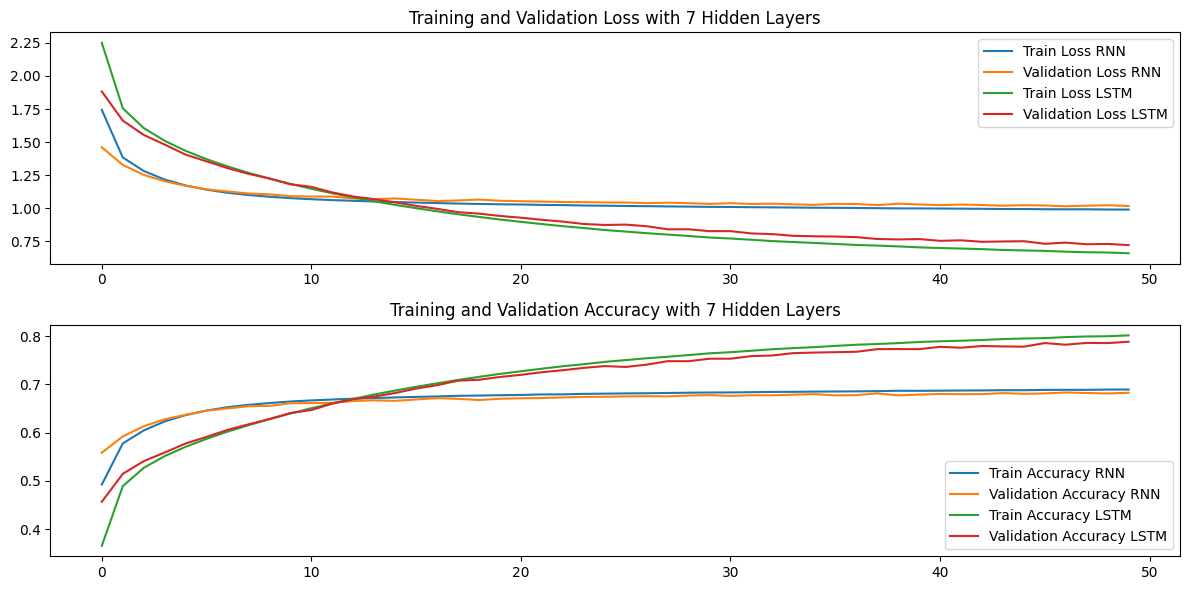

4038.3452520370483


In [11]:
dataset = Shakespeare('shakespeare.txt')
batch_size = 64
validation_split = 0.2
shuffle_dataset = True
random_seed = 24

dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

vocab_size = len(dataset.chars)
hidden_size = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 50

for num_layers in range(7,8):
    start=time.time()
    print(f'\nTraining with {num_layers} hidden layers\n')

    model_rnn = CharRNN(vocab_size, hidden_size, num_layers).to(device)
    model_lstm = CharLSTM(vocab_size, hidden_size, num_layers).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer_rnn = optim.RMSprop(model_rnn.parameters(), lr=0.001)
    optimizer_lstm = optim.RMSprop(model_lstm.parameters(), lr=0.001)

    trn_losses_rnn, val_losses_rnn = [], []
    trn_acc_rnn, val_acc_rnn = [], []
    trn_losses_lstm = []
    val_losses_lstm = []
    trn_acc_lstm = []
    val_acc_lstm = []

    for epoch in range(num_epochs):
        trn_loss_rnn, trn_accuracy_rnn = train(model_rnn, train_loader, device, criterion, optimizer_rnn)
        val_loss_rnn, val_accuracy_rnn = validate(model_rnn, val_loader, device, criterion)
        trn_losses_rnn.append(trn_loss_rnn)
        val_losses_rnn.append(val_loss_rnn)
        trn_acc_rnn.append(trn_accuracy_rnn)
        val_acc_rnn.append(val_accuracy_rnn)

        trn_loss_lstm, trn_accuracy_lstm = train(model_lstm, train_loader, device, criterion, optimizer_lstm)
        val_loss_lstm, val_accuracy_lstm = validate(model_lstm, val_loader, device, criterion)
        trn_losses_lstm.append(trn_loss_lstm)
        val_losses_lstm.append(val_loss_lstm)
        trn_acc_lstm.append(trn_accuracy_lstm)
        val_acc_lstm.append(val_accuracy_lstm)

        print(f'Epoch {epoch+1}/{num_epochs}, RNN Loss: {val_loss_rnn:.4f}, RNN Accuracy: {val_accuracy_rnn:.4f}, '
                f'LSTM Loss: {val_loss_lstm:.4f}, LSTM Accuracy: {val_accuracy_lstm:.4f}')

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(trn_losses_rnn, label='Train Loss RNN')
    plt.plot(val_losses_rnn, label='Validation Loss RNN')
    plt.plot(trn_losses_lstm, label='Train Loss LSTM')
    plt.plot(val_losses_lstm, label='Validation Loss LSTM')
    plt.title(f'Training and Validation Loss with {num_layers} Hidden Layers')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(trn_acc_rnn, label='Train Accuracy RNN')
    plt.plot(val_acc_rnn, label='Validation Accuracy RNN')
    plt.plot(trn_acc_lstm, label='Train Accuracy LSTM')
    plt.plot(val_acc_lstm, label='Validation Accuracy LSTM')
    plt.title(f'Training and Validation Accuracy with {num_layers} Hidden Layers')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    print(time.time()-start)



In [ ]:
import torch

# model_rnn과 model_lstm은 이미 학습된 모델 객체라고 가정합니다.
# num_layers는 히든 레이어 수를 나타냅니다.

# 모델 파라미터를 저장할 파일 이름 지정
rnn_model_path = f'char_rnn_{7}_layers.pth'
lstm_model_path = f'char_lstm_{7}_layers.pth'

# 모델 파라미터 저장
torch.save(model_rnn.state_dict(), rnn_model_path)
torch.save(model_lstm.state_dict(), lstm_model_path)

print(f"Saved RNN model with {num_layers} hidden layers to {rnn_model_path}")
print(f"Saved LSTM model with {num_layers} hidden layers to {lstm_model_path}")
